<a href="https://colab.research.google.com/github/ibrunaneves/PraticasDeMachineLearning/blob/main/Q4_Hackathon_Unifacisa_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Instituição - UNIFACISA
# Autor: Bruna Neves - 27/03/25

**Questão 4 (intermediário)**

Análise de Clusterização de Dados de Saúde.
Você recebeu um dataset contendo informações sobre pacientes, incluindo idade, IMC, pressão arterial, níveis de glicose e colesterol. Seu objetivo é realizar uma clusterização para identificar padrões de saúde entre os pacientes.

Tarefas:
Carregue o dataset e faça uma análise exploratória inicial.
Aplique uma técnica de redução de dimensionalidade (exemplo: PCA) para facilitar a visualização dos dados.
Utilize o algoritmo DBSCAN ou K-Means para realizar a clusterização.
Analise os grupos gerados e interprete as diferenças entre eles.

Pergunta: Quantos grupos foram identificados? Como você interpretaria os padrões de cada cluster em termos de saúde dos pacientes?

In [3]:
# Importandp as bibliotecas

import pandas as pd  # manipulação de dados em tabelas
import numpy as np  # cálculos matemáticos e geração de dados simulados
import matplotlib.pyplot as plt  # criação de gráficos
import seaborn as sns  # gráficos estatísticos com visual mais bonito

from sklearn.preprocessing import StandardScaler  # normalização dos dados
from sklearn.decomposition import PCA  # redução de dimensionalidade com Análise de Componentes Principais
from sklearn.cluster import KMeans  # algoritmo de agrupamento não supervisionado

# Geração de dados simulados de pacientes

np.random.seed(42)  # garante que os dados sejam reproduzíveis
num_pacientes = 300  # número de pacientes do dataset

# Criando um DataFrame com dados aleatórios representando medidas clínicas

df_saude = pd.DataFrame({
    'idade': np.random.randint(18, 81, num_pacientes),  # entre 18 e 80 anos
    'imc': np.random.normal(27, 5, num_pacientes),  # média de IMC com desvio padrão
    'pressao_arterial': np.random.normal(120, 15, num_pacientes),  # pressão sistólica média
    'glicose': np.random.normal(100, 25, num_pacientes),  # glicose em jejum
    'colesterol': np.random.normal(180, 40, num_pacientes)  # colesterol total
})

# Visualizando as primeiras linhas do DataFrame

df_saude.head()


,idade,imc,pressao_arterial,glicose,colesterol
0,56,26.826441,143.267280,102.855691,153.943280
1,69,21.156610,121.735120,103.757544,160.644567
2,46,32.714114,137.689458,90.909695,167.186108
3,32,30.759665,121.012777,98.576359,196.966638
4,60,30.955160,150.911219,107.695044,200.913420


            idade         imc  pressao_arterial     glicose  colesterol  \
count  300.000000  300.000000        300.000000  300.000000  300.000000   
mean    50.533333   27.259690        119.374701  103.013025  183.151254   
std     18.916881    4.832515         15.501811   23.784089   40.426452   
min     18.000000   10.793663         79.546700   39.403017   64.149785   
25%     34.000000   23.517002        108.511625   86.091542  154.843501   
50%     51.500000   27.394197        119.113022  103.959425  183.109142   
75%     67.250000   30.332487        129.714351  117.554260  208.519556   
max     80.000000   46.263657        166.183212  165.809552  283.188374   

          cluster  
count  300.000000  
mean     1.083333  
std      0.794876  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      2.000000  
max      2.000000  


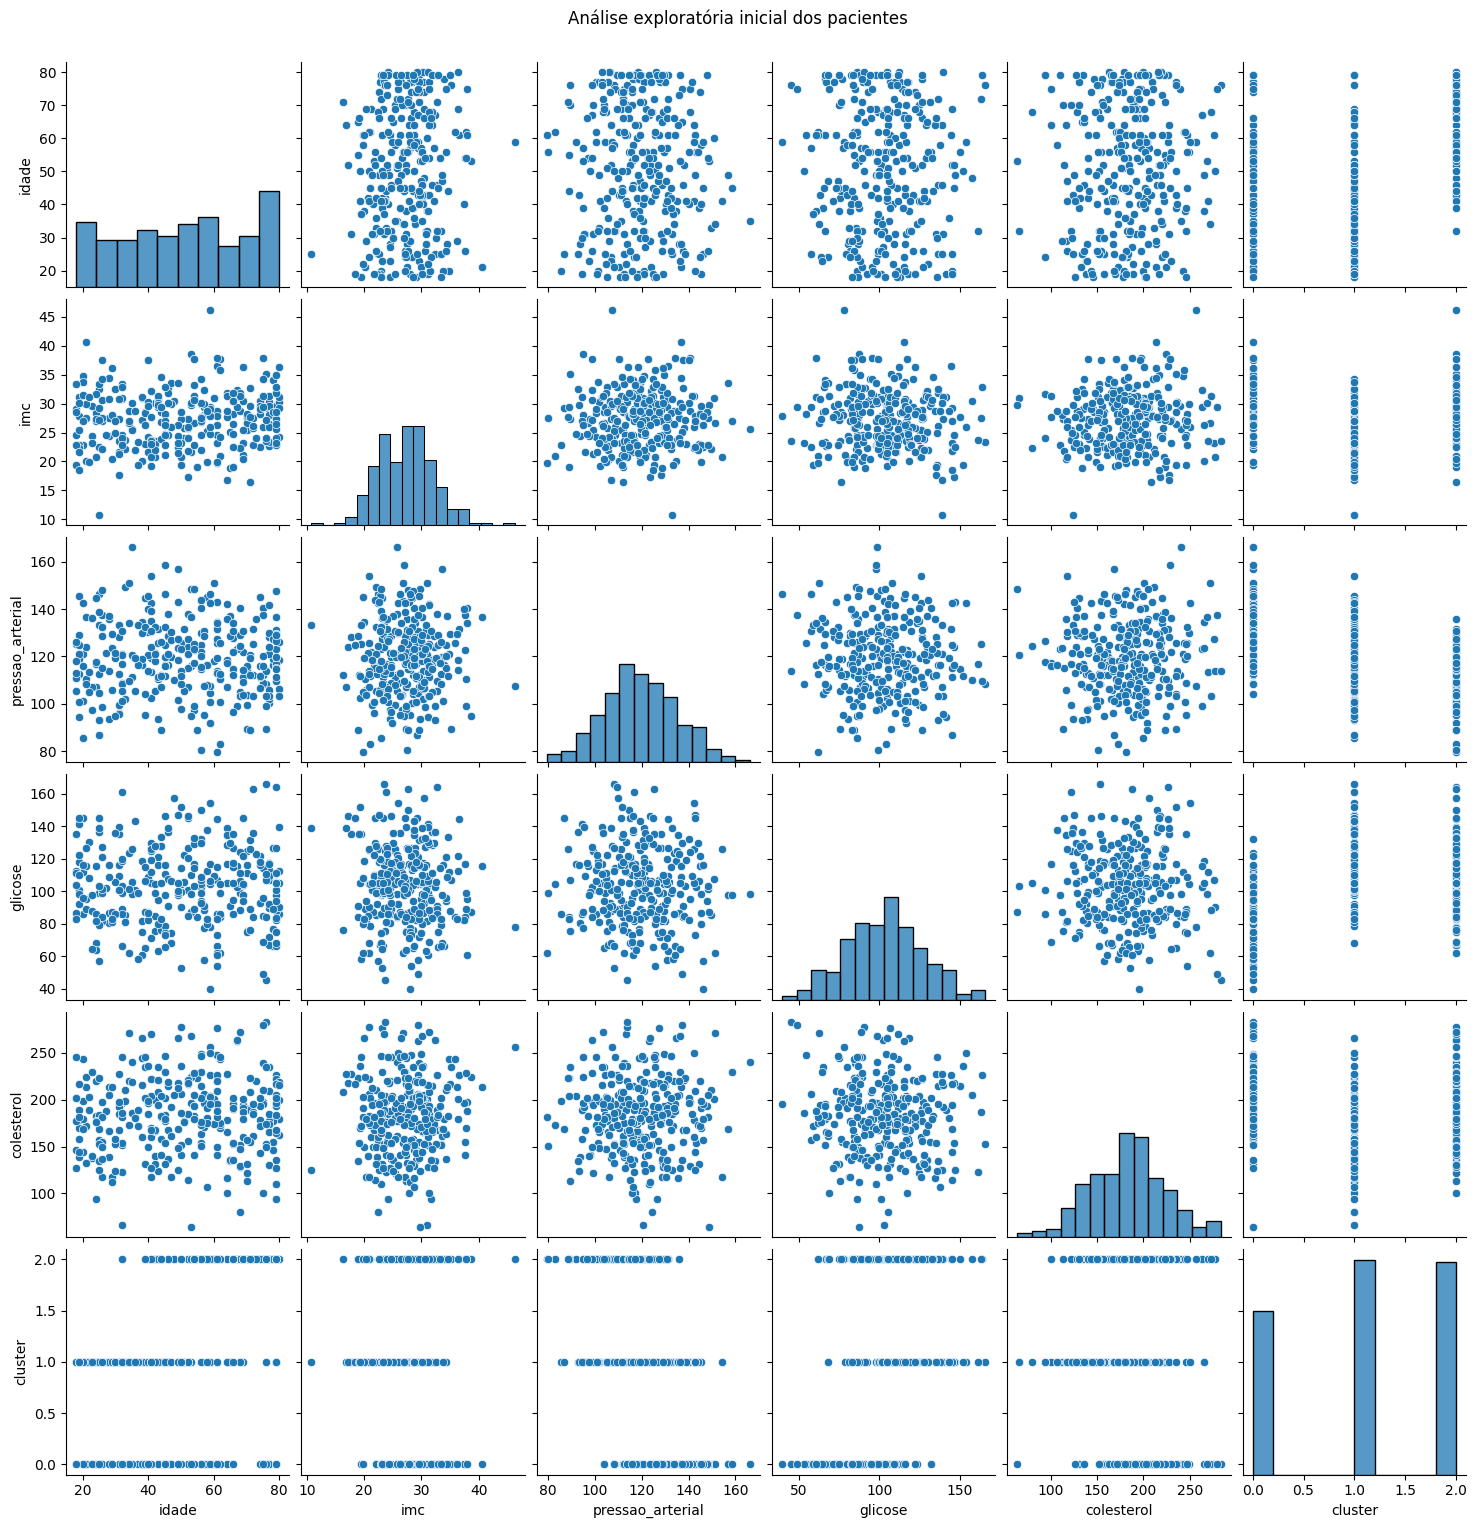

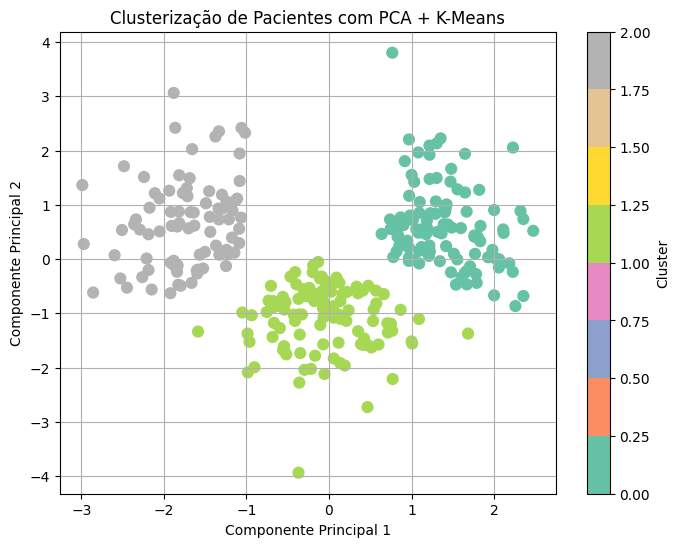

In [5]:
# Análise exploratória dos dados com Estatísticas descritivas (média, desvio padrão, mínimo, máximo, etc.)

print(df_saude.describe())

# Gráfico de dispersão entre todas as variáveis para ajudar a entender padrões, correlações e possíveis outliers

sns.pairplot(df_saude)
plt.suptitle("Análise exploratória inicial dos pacientes", y=1.02)
plt.show()

# Normalização dos dados para que variáveis com escalas diferentes não dominem o agrupamento

scaler = StandardScaler()
dados_normalizados = scaler.fit_transform(df_saude)  # retorna array com os dados padronizados

# Redução de dimensionalidade com PCA que transforma os dados em novos eixos principais, mantendo o máximo de informação

pca = PCA(n_components=2)
dados_pca = pca.fit_transform(dados_normalizados)  # aplicando PCA nos dados normalizados

# Aplicação do K-Means, algoritmo de clusterização que agrupa os dados em k grupos baseados na proximidade

kmeans = KMeans(n_clusters=3, random_state=42)  # definindo 3 clusters
clusters = kmeans.fit_predict(dados_pca)  # executando o agrupamento com base nos dados reduzidos

# Adicionando o número do cluster ao DataFrame original

df_saude['cluster'] = clusters

# Visualização dos clusters em 2D com as componentes principais do PCA

plt.figure(figsize=(8, 6))
plt.scatter(dados_pca[:, 0], dados_pca[:, 1], c=clusters, cmap='Set2', s=60)
plt.title("Clusterização de Pacientes com PCA + K-Means")
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.grid(True)
plt.colorbar(label='Cluster')
plt.show()


In [6]:
# Agrupando os dados por cluster e calculando a média de cada variável

resumo_clusters = df_saude.groupby('cluster').mean().round(2)

# Exibindo o resumo

print("Resumo das características médias por cluster:")
print(resumo_clusters)


Resumo das características médias por cluster:
         idade    imc  pressao_arterial  glicose  colesterol
cluster                                                     
0        65.46  28.45            110.92   104.95      191.65
1        38.93  24.48            117.93   114.41      161.93
2        46.35  29.36            132.27    85.53      199.96


**Como interpretar:**

Cluster 0:
Idade média alta, IMC elevado, pressão e colesterol altos → Grupo de alto risco cardiovascular

Cluster 1:
Idade mais baixa, IMC e glicose baixos → Grupo saudável ou de baixo risco

Cluster 2:
Idade mais avançada, variáveis intermediárias → Grupo com necessidade de atenção médica constante